A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


## Ejercicio 1

### Carga los datos originales

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)

In [17]:
from sklearn.decomposition import PCA

pca2 = PCA(2)
pca3 = PCA(3)

pca2.fit(X_train)
pca3.fit(X_train)

X_train_pca2 = pca2.transform(X_train)
X_train_pca3 = pca3.transform(X_train)

print("PCA 2:", pca2.explained_variance_ratio_)
print("PCA 3:", pca3.explained_variance_ratio_)

PCA 2: [0.91959926 0.05714377]
PCA 3: [0.91959926 0.05714377 0.01838378]


### Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.

In [18]:
import pandas as pd

pd.DataFrame(X_train_pca2)[0]

0     -3.171916
1     -2.347458
2      0.971521
3     -2.567534
4     -2.950888
         ...   
115    0.403763
116    0.570808
117   -2.604720
118    0.278105
119    2.660469
Name: 0, Length: 120, dtype: float64

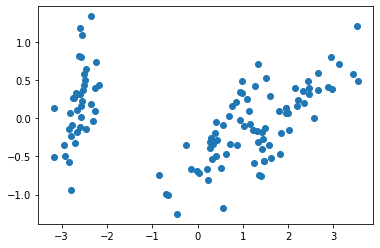

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

plt.scatter(x = pd.DataFrame(X_train_pca2)[0], y = pd.DataFrame(X_train_pca2)[1])

In [24]:
# PCA(2)
from sklearn.cluster import KMeans

# Model
kmeans = KMeans(n_clusters = 3, random_state = 42)

# Training
kmeans.fit(X_train_pca2)

# Transformation
pca2.fit(X_test)
X_test_pca2 = pca2.transform(X_test)

# Prediction
predict_pca2 = kmeans.predict(X_test_pca2)

predict_pca2

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [26]:
# PCA(3)
from sklearn.cluster import KMeans

# Model
kmeans = KMeans(n_clusters = 3, random_state = 42)

# Training
kmeans.fit(X_train_pca3)

# Transformation
pca3.fit(X_test)
X_test_pca3 = pca3.transform(X_test)

# Prediction
predict_pca3 = kmeans.predict(X_test_pca3)

predict_pca3

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

### Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).

In [34]:
# REVISAR

df = pd.DataFrame([y_test, predict_pca2, predict_pca3], index = ["y_test", "predict_pca2", "predict_pca3"]).T

df.head()

,y_test,predict_pca2,predict_pca3
0,1,2,2
1,0,1,0
2,2,0,1
3,1,2,2
4,1,2,2


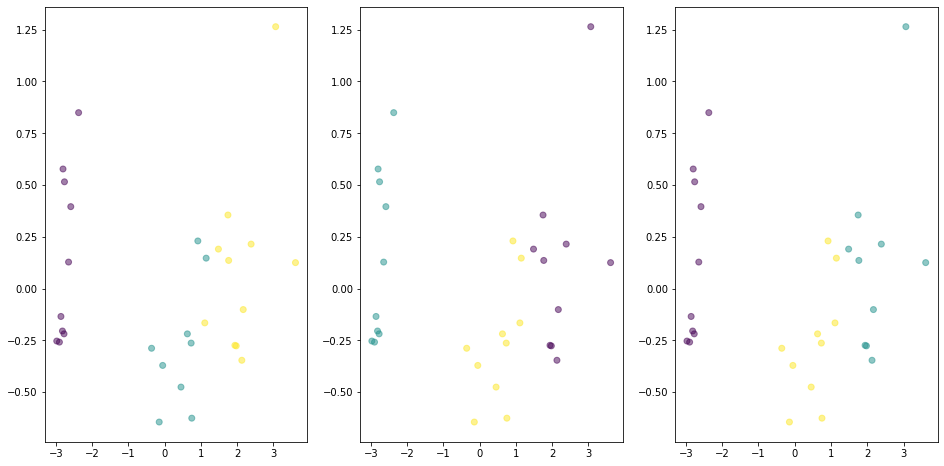

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 8))

ax1.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], c = df["y_test"], alpha = .5)
ax2.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], c = df["predict_pca2"], alpha = .5)
ax3.scatter(x = pd.DataFrame(X_test_pca2)[0], y = pd.DataFrame(X_test_pca2)[1], c = df["predict_pca3"], alpha = .5)

plt.show()

### ¿Es mejor PCA(2) o PCA(3)?